# **Train a model to classify images based on orientation**

# Connect to Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Install and Import

In [ ]:
%%capture
!pip install ultralytics

In [ ]:
from google.colab.patches import cv2_imshow
from IPython.display import display, Image
from ultralytics import YOLO
import numpy as np
import ultralytics
import glob
import cv2

ultralytics.checks()

Ultralytics 8.3.167 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 42.1/112.6 GB disk)


# Load Roboflow datasets for training

In [ ]:
!rm -r datasets
!mkdir datasets
%cd datasets

project_version = 7

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="Your API key")
project = rf.workspace("hello-world-iqdze").project("image_angle")
version = project.version(project_version)
dataset = version.download("folder")

%cd /content

/content/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to image_angle-7 in folder:: 100%|██████████| 497/497 [00:00<00:00, 9323.72it/s]

/content


# Training

In [ ]:
# @title Remove unnecessary directory named 'train'
!rm -r runs/classify/train

- Select one of the models for training

In [ ]:
model = 'yolo11n-cls.pt'

In [ ]:
model = '/content/drive/MyDrive/sharingColab/invoice/model_angle/best_angle_cls.pt'

In [ ]:
# @title YOLO model training
!yolo task=classify mode=train model={model} data=datasets/image_angle-{project_version} epochs=300 batch=120 cache=True cos_lr=True warmup_epochs=5 patience=5000 imgsz=640 lr0=0.001

Ultralytics 8.3.167 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=120, bgr=0.0, box=7.5, cache=True, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=True, cutmix=0.0, data=datasets/image_angle-7, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=300, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=/content/drive/MyDrive/sharingColab/invoice/model_angle/newTrain/best_angle_cls.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=Tr

In [ ]:
!ls /content/runs/classify/train/

args.yaml			 train_batch0.jpg     train_batch2.jpg
confusion_matrix_normalized.png  train_batch1960.jpg  val_batch0_labels.jpg
confusion_matrix.png		 train_batch1961.jpg  val_batch0_pred.jpg
results.csv			 train_batch1962.jpg  weights
results.png			 train_batch1.jpg


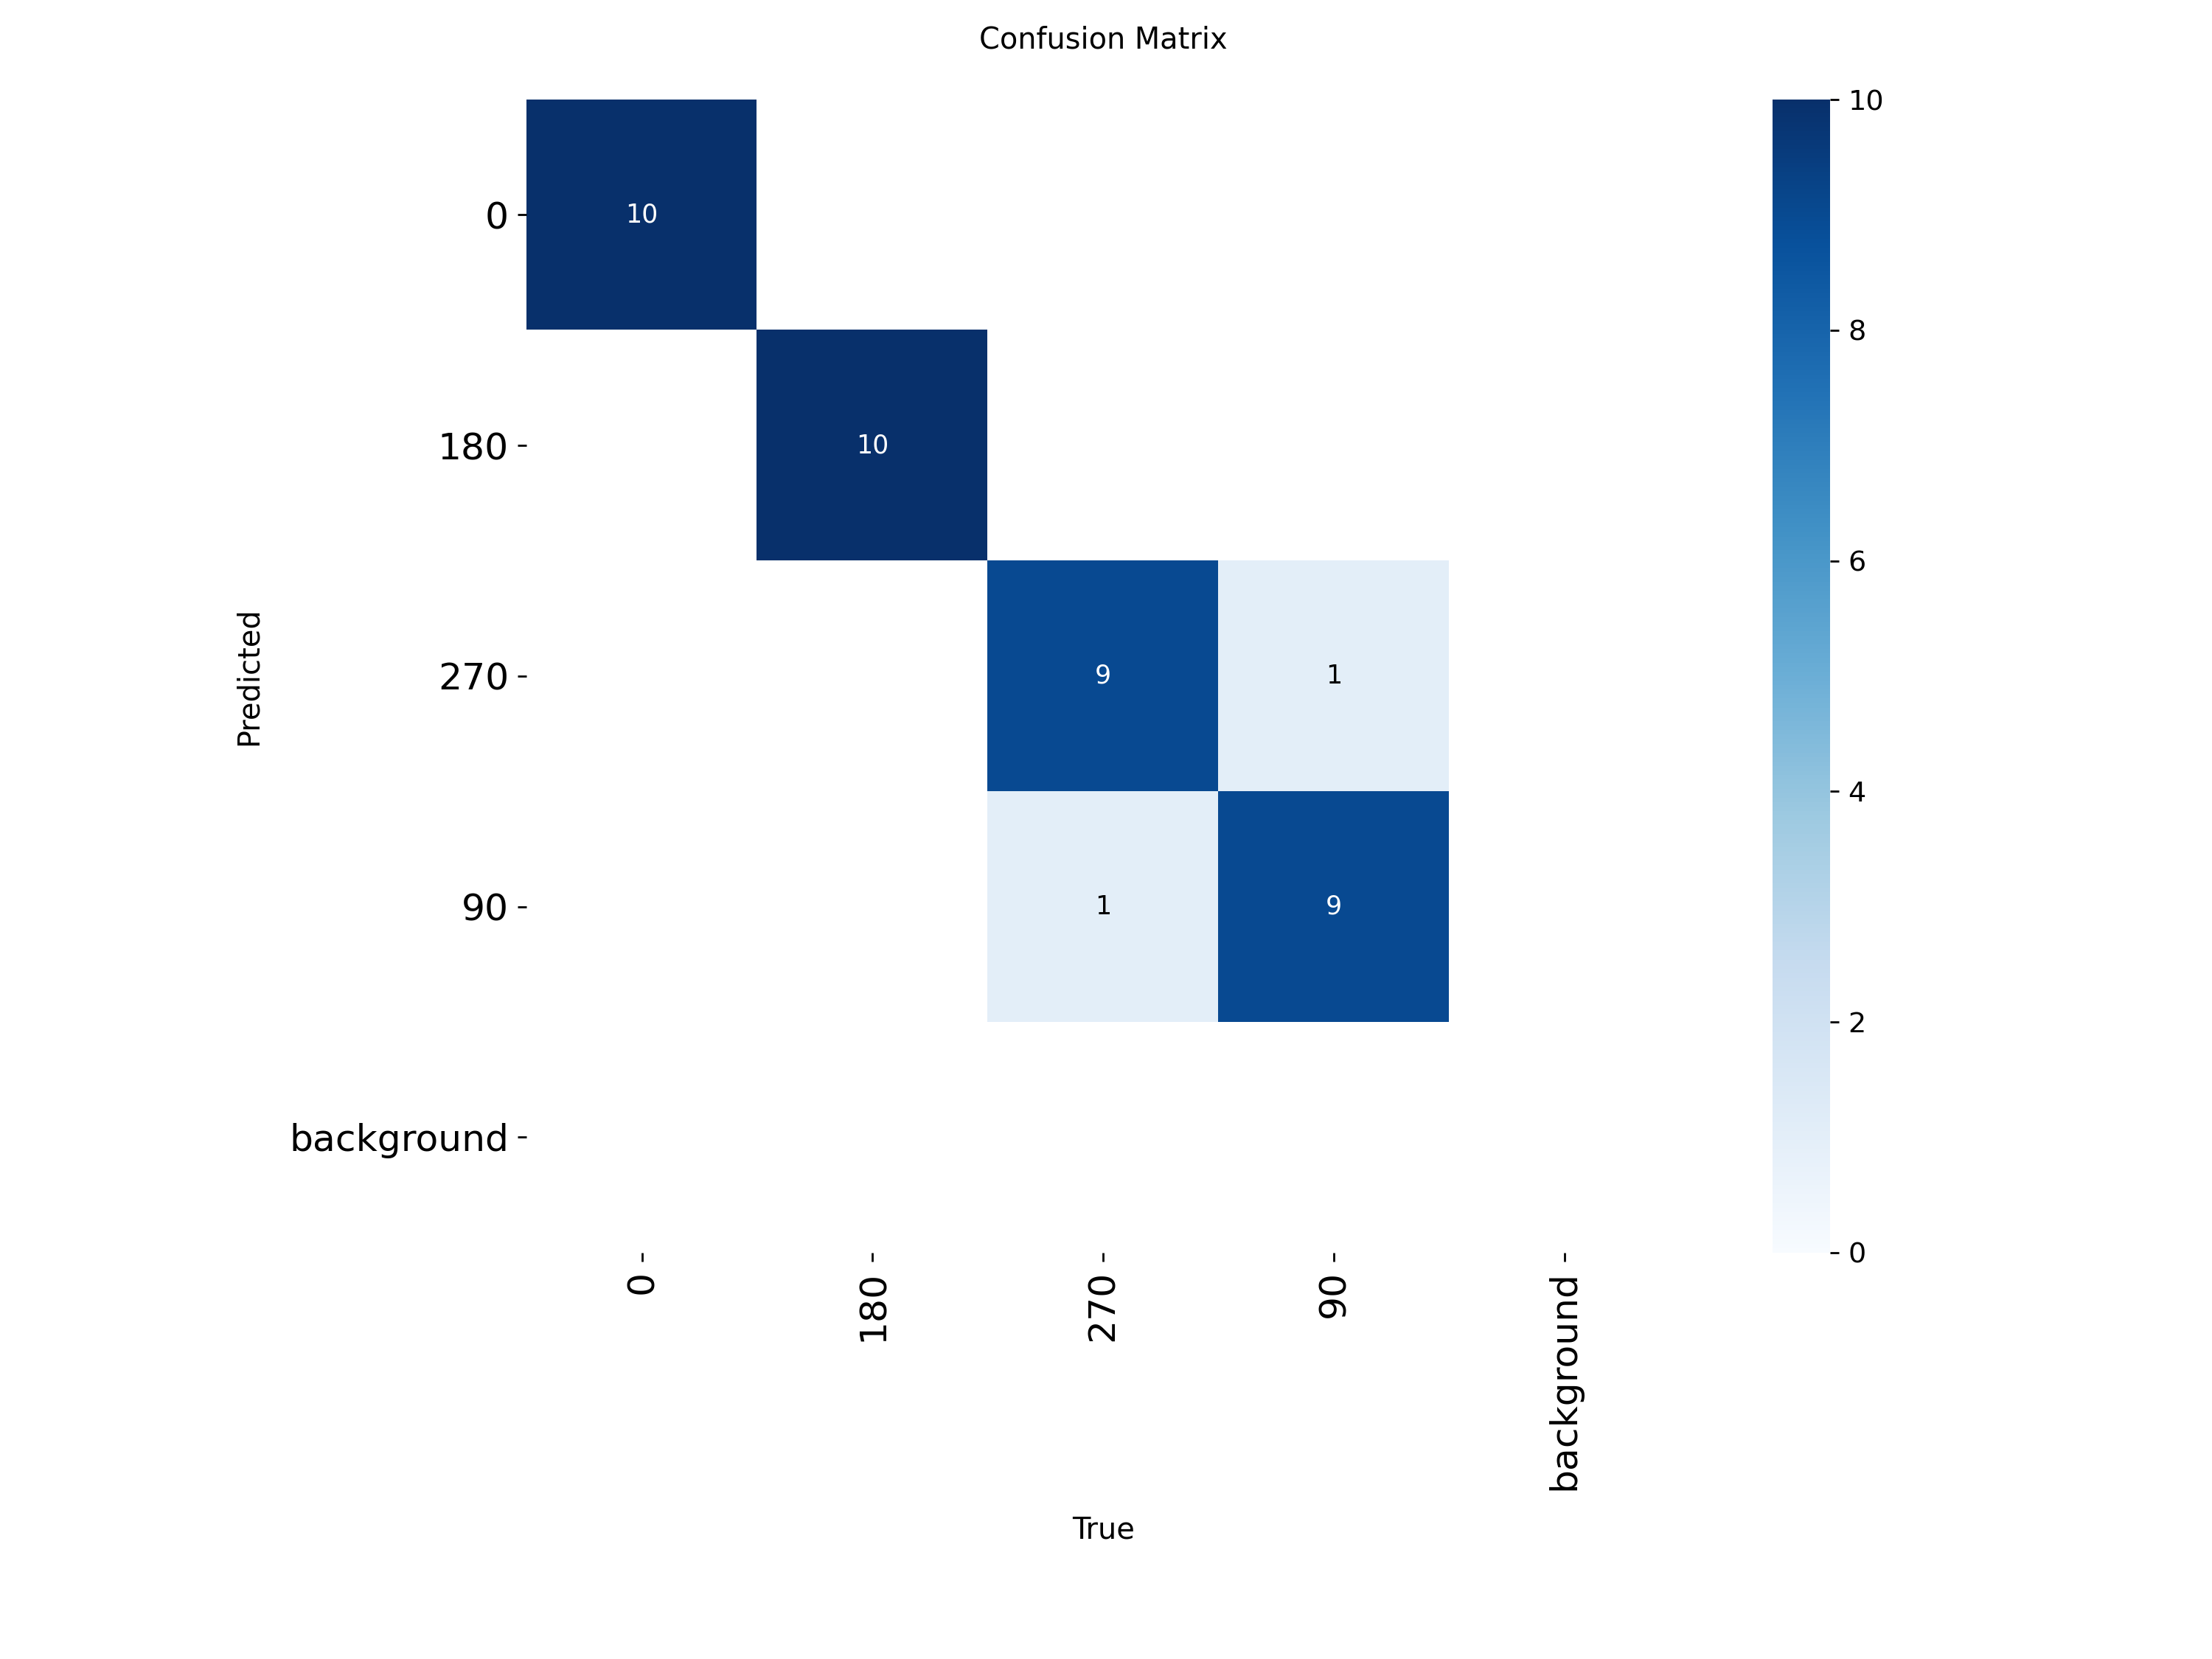

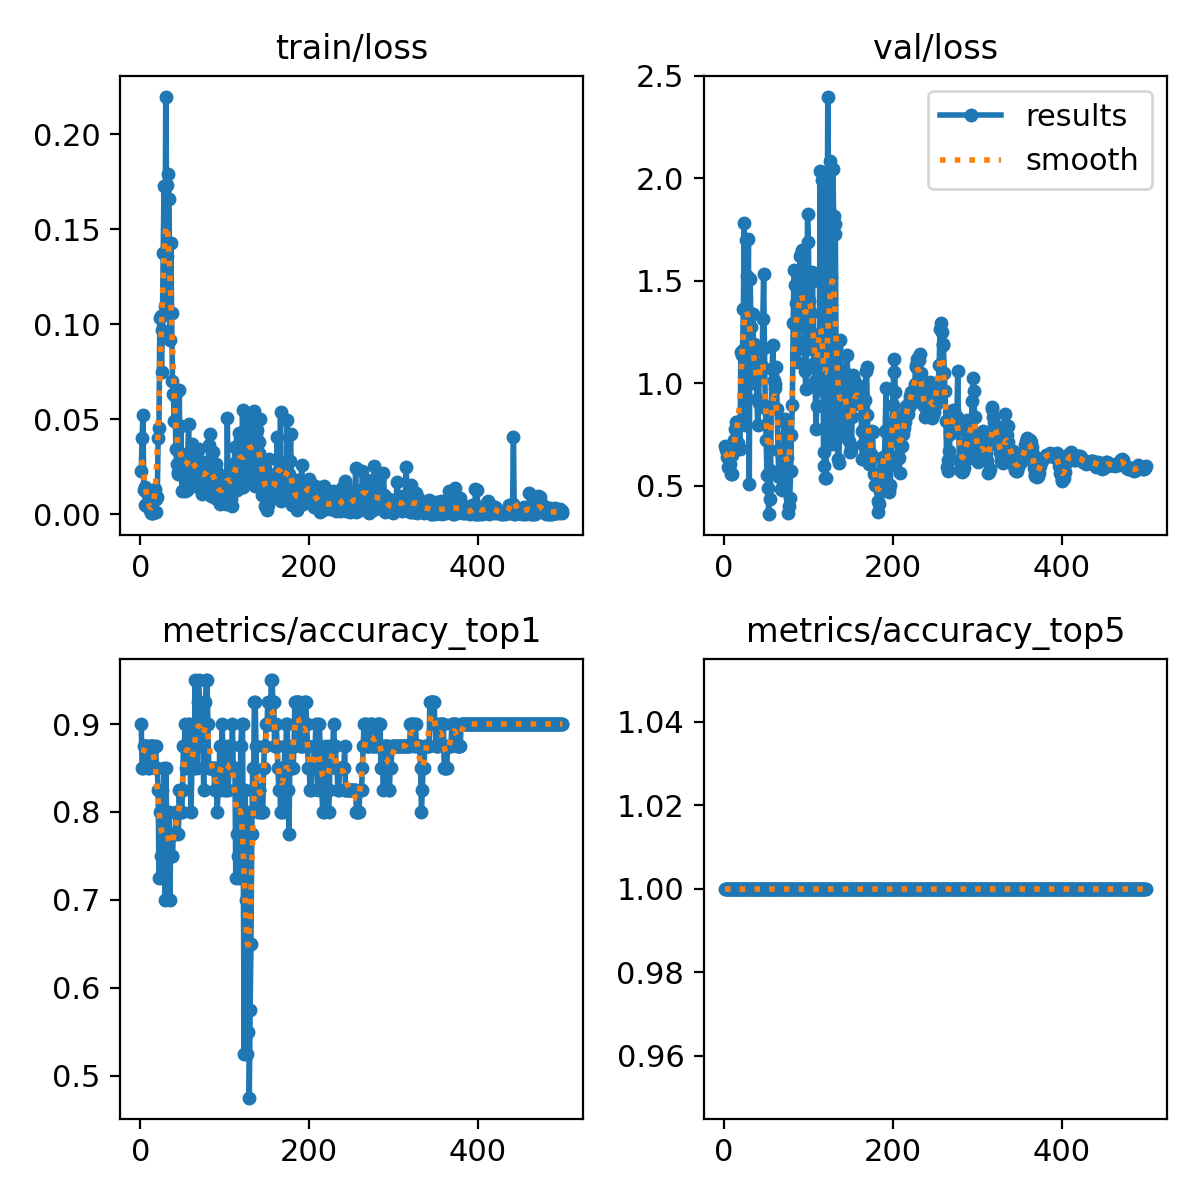

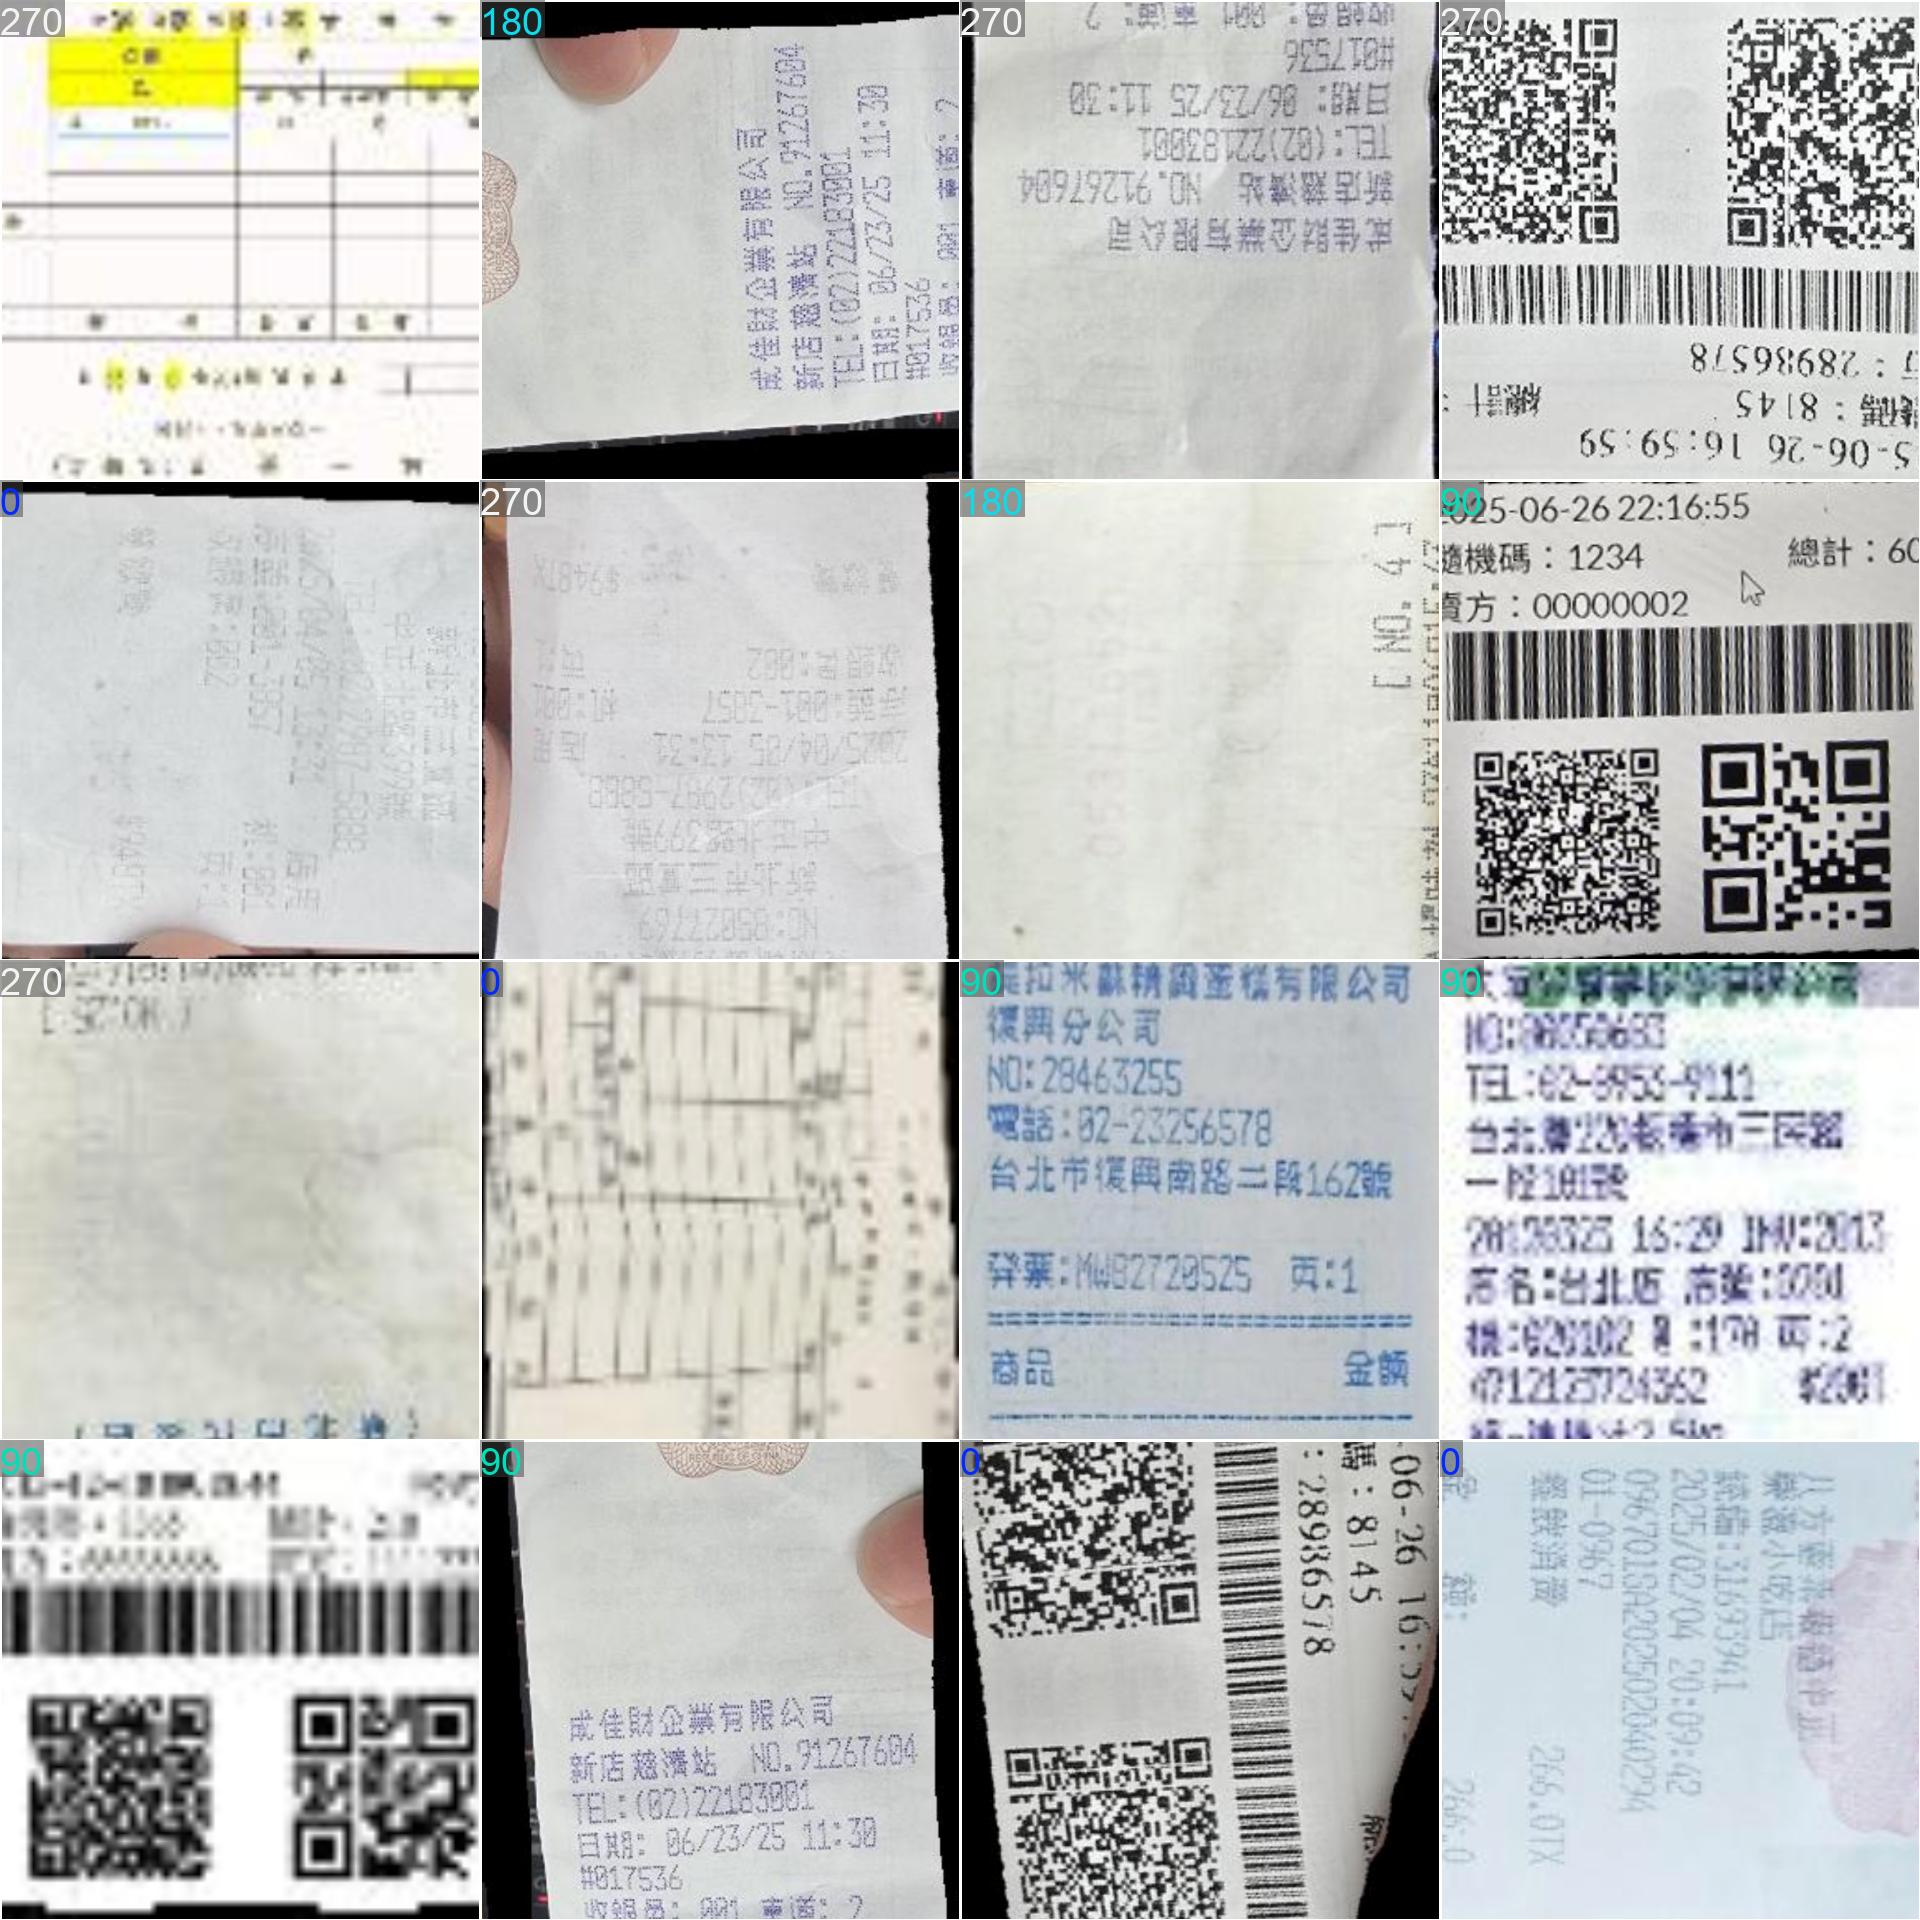

In [ ]:
display(Image(filename=f'/content/runs/classify/train/confusion_matrix.png', width=600))
display(Image(filename=f'/content/runs/classify/train/results.png', width=600))
display(Image(filename=f'/content/runs/classify/train/val_batch0_pred.jpg', width=600))

In [ ]:
%cd datasets/image_angle-{project_version}/
!mv test/0/* test
!mv test/90/* test
!mv test/180/* test
!mv test/270/* test
%cd test
!rm -r 0 90 180 270
%cd /content

/content/datasets/image_angle-7
mv: cannot stat 'test/0/*': No such file or directory
mv: cannot stat 'test/90/*': No such file or directory
mv: cannot stat 'test/180/*': No such file or directory
mv: cannot stat 'test/270/*': No such file or directory
/content/datasets/image_angle-7/test
rm: cannot remove '0': No such file or directory
rm: cannot remove '90': No such file or directory
rm: cannot remove '180': No such file or directory
rm: cannot remove '270': No such file or directory
/content


In [ ]:
!yolo task=classify mode=predict model=/content/runs/classify/train/weights/best.pt conf=0.5 source=datasets/image_angle-{project_version}/test save=True

Ultralytics 8.3.167 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n-cls summary (fused): 47 layers, 1,531,148 parameters, 0 gradients, 3.2 GFLOPs

image 1/20 /content/datasets/image_angle-7/test/result_bill_021_png.rf.4cbcd1582648c683b250b07037d6b809.jpg: 224x224 270 0.99, 90 0.01, 180 0.00, 0 0.00, 8.4ms
image 2/20 /content/datasets/image_angle-7/test/result_bill_023_png.rf.6d1d05ca13e6ae681c61d9ed3b167f1d.jpg: 224x224 90 0.99, 270 0.01, 0 0.00, 180 0.00, 4.8ms
image 3/20 /content/datasets/image_angle-7/test/result_bill_025_png.rf.9efff4299caca5ead01f200c4251df5c.jpg: 224x224 0 1.00, 180 0.00, 90 0.00, 270 0.00, 4.3ms
image 4/20 /content/datasets/image_angle-7/test/result_bill_027_png.rf.eca3d1fbe3666ea6888bbaed0c031bbf.jpg: 224x224 180 0.95, 0 0.05, 270 0.00, 90 0.00, 4.2ms
image 5/20 /content/datasets/image_angle-7/test/result_elec_002_png.rf.8db25d58cf88337ace14d0050eca17ad.jpg: 224x224 0 1.00, 180 0.00, 90 0.00, 270 0.00, 4.6ms
image 6/20 /content/datasets/i

In [ ]:
model = YOLO('/content/runs/classify/train/weights/best.pt')
result_list = model(f'datasets/image_angle-{project_version}/test/*')


image 1/20 /content/datasets/image_angle-7/test/result_bill_021_png.rf.4cbcd1582648c683b250b07037d6b809.jpg: 224x224 270 1.00, 90 0.00, 180 0.00, 0 0.00, 6.2ms
image 2/20 /content/datasets/image_angle-7/test/result_bill_023_png.rf.6d1d05ca13e6ae681c61d9ed3b167f1d.jpg: 224x224 90 1.00, 270 0.00, 180 0.00, 0 0.00, 4.8ms
image 3/20 /content/datasets/image_angle-7/test/result_bill_025_png.rf.9efff4299caca5ead01f200c4251df5c.jpg: 224x224 180 0.66, 0 0.34, 90 0.00, 270 0.00, 4.4ms
image 4/20 /content/datasets/image_angle-7/test/result_bill_027_png.rf.eca3d1fbe3666ea6888bbaed0c031bbf.jpg: 224x224 180 0.94, 0 0.06, 90 0.00, 270 0.00, 4.2ms
image 5/20 /content/datasets/image_angle-7/test/result_elec_002_png.rf.8db25d58cf88337ace14d0050eca17ad.jpg: 224x224 0 1.00, 180 0.00, 90 0.00, 270 0.00, 5.0ms
image 6/20 /content/datasets/image_angle-7/test/result_elec_030_png.rf.a56225d9b7876beecd20e190b356a144.jpg: 224x224 90 1.00, 270 0.00, 0 0.00, 180 0.00, 4.2ms
image 7/20 /content/datasets/image_angl

270


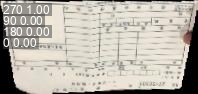


90


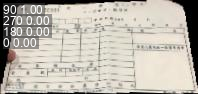


180


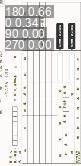


180


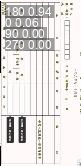


0


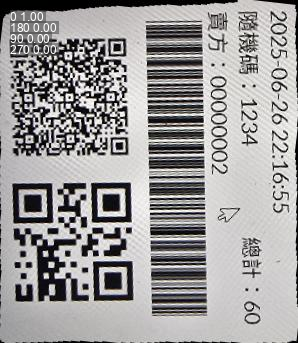


90


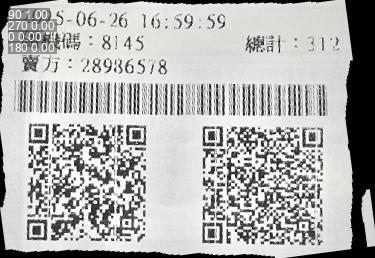


180


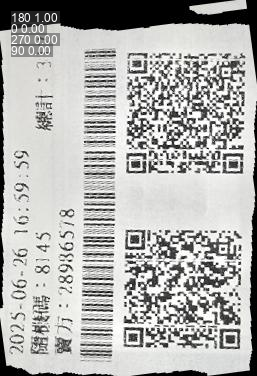


270


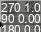


180


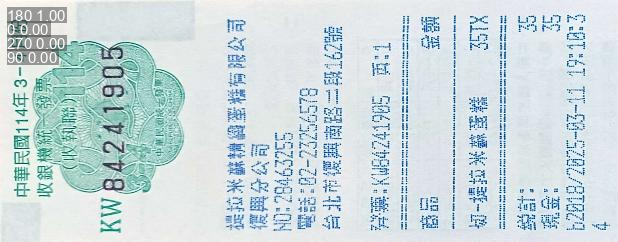


180


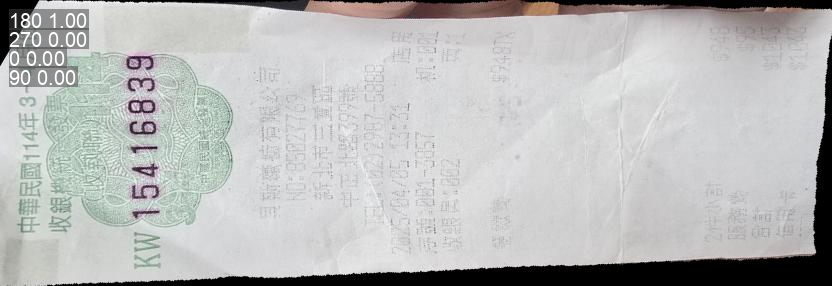


180


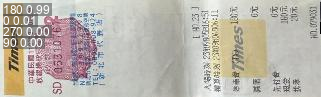


270


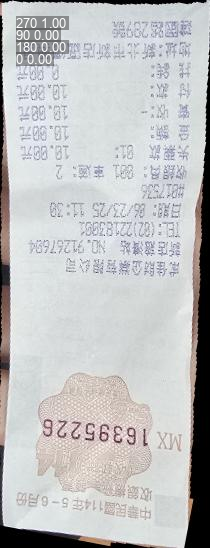


0


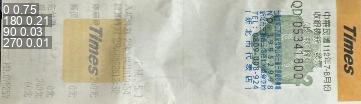


90


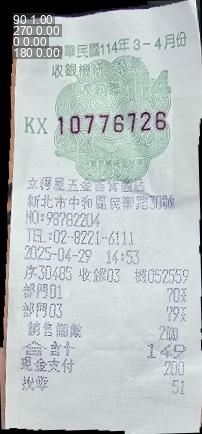


270


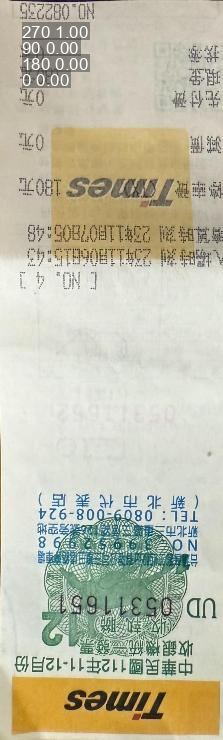


90


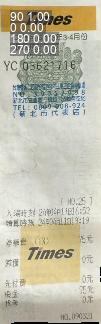


0


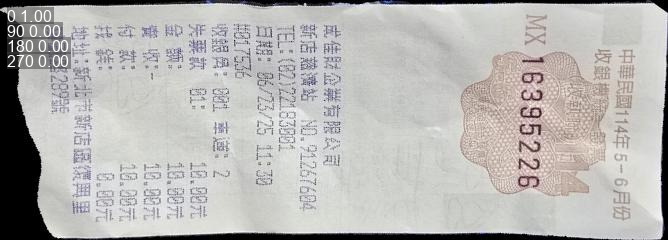


0


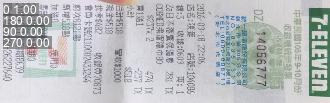


270


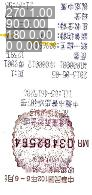


90


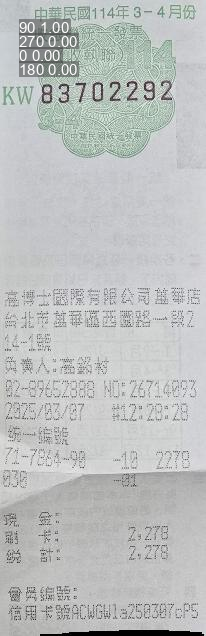

In [ ]:
for result in result_list:
  print(model.names[result.probs.top1])
  cv2_imshow(result.plot())
  print()

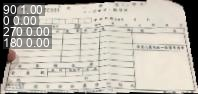

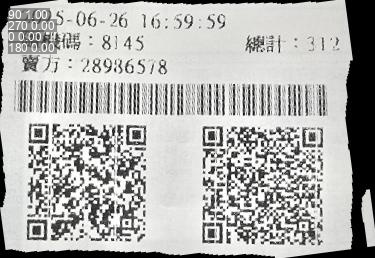

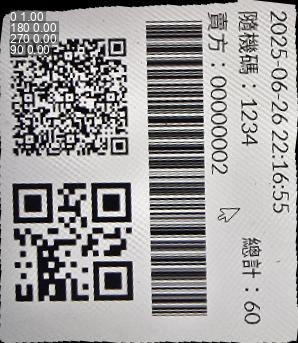

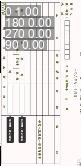

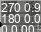

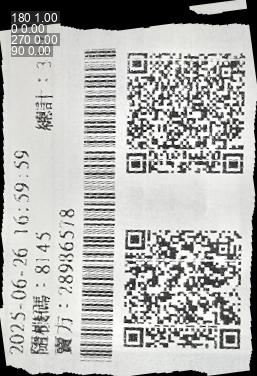

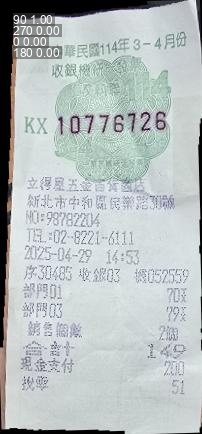

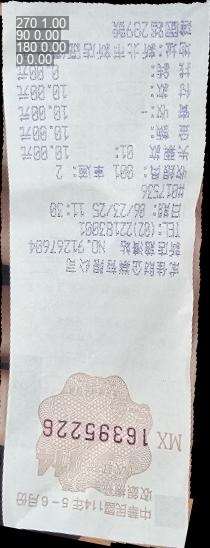

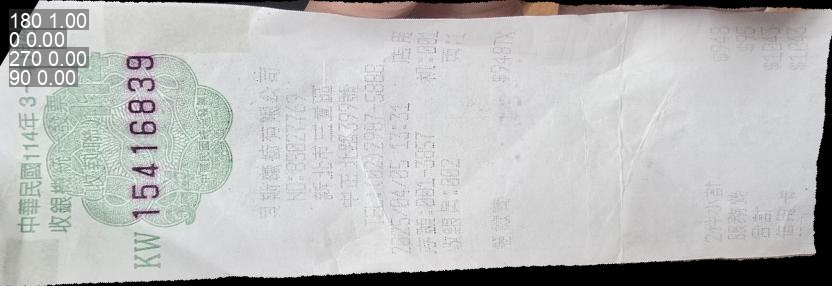

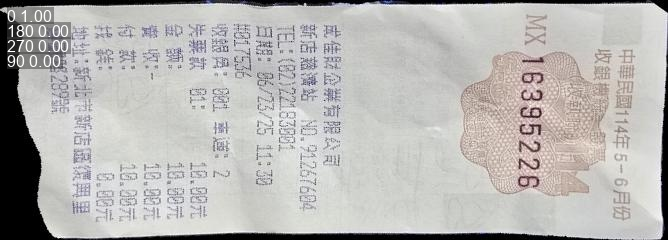

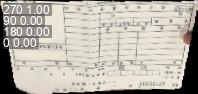

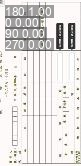

In [ ]:
for image_path in glob.glob('/content/runs/classify/predict/*'):
  display(Image(filename=image_path, width=600))

# Saving the model to Google Drive

In [ ]:
drive.mount('/content/drive/', force_remount=True)

saving_directory = '/content/drive/MyDrive/sharingColab/invoice/model_angle/'
best_name = 'best_angle_cls.pt'
version = '1'

# Move the original model to the history directory and assign a version number to its filename
!cp {saving_directory + best_name} {saving_directory + 'history/best_angle_cls' + version + '.pt'}
# Saving the model to Google Drive and rename it
!cp /content/runs/classify/train/weights/best.pt {saving_directory + best_name}

Mounted at /content/drive/
